# EDA PROJECT


Link to blog on Medium:
https://alexafre.medium.com/netflix-movies-and-tv-shows-6517fc0b1c84

## Importing Libararies

In [ ]:
#Importing neccessary Libraries 

import numpy as np
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the csv data

In [ ]:
#Reading AND Converting data from csv file to a  dataframe
data = pd.read_csv("netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# Shape of the data
print("Shape of the data", data.shape)
print("Number of rows {} and number of columns {}".format(data.shape[0], data.shape[1]))

Shape of the data (7787, 12)
Number of rows 7787 and number of columns 12


In [ ]:
# Viewing the features/ columns of the dataset

print(" The columns/features present in the datset are ", data.columns.values)

 The columns/features present in the datset are  ['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'release_year' 'rating' 'duration' 'listed_in' 'description']


In [ ]:
# Finding the types of each column in the data set
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Columns that have Null Values : 
Director, cast, country, date_added, rating 

In [ ]:
# To find general information of the datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


The latest movie released was in 2021 and the earliest was in 1925


.describe() gives you the statistics of the numerical data in the dataset

In [ ]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Number of unique values in each columns

In [ ]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Columns that has Null Values : Director, cast, country, date_added, rating

In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
director_null = data["director"].isnull().sum()
cast_null = data["cast"].isnull().sum()
country_null = data["country"].isnull().sum()
date_added_null = data["date_added"].isnull().sum()
rating_null = data["rating"].isnull().sum()

print("The null values for Features Directors are {}, Cast are {}, Country are {}, Data_added are {}, Rating are {}".format(director_null,cast_null,country_null,date_added_null,rating_null))


The null values for Features Directors are 2389, Cast are 718, Country are 507, Data_added are 10, Rating are 7


Exploring the most common values in each possible feature

In [ ]:
for col in data.columns.values:
  if col not in ["show_id", "Movie", "title", "description"]:
    most_common = data[col].mode().item()
    print("The most common {} is {} and has appeared {} times".format(col, most_common, sum(data[col] == most_common)))

The most common type is Movie and has appeared 5377 times
The most common director is Raúl Campos, Jan Suter and has appeared 18 times
The most common cast is David Attenborough and has appeared 18 times
The most common country is United States and has appeared 2555 times
The most common date_added is January 1, 2020 and has appeared 118 times
The most common release_year is 2018 and has appeared 1121 times
The most common rating is TV-MA and has appeared 2863 times
The most common duration is 1 Season and has appeared 1608 times
The most common listed_in is Documentaries and has appeared 334 times


## Data manipulation - Filling the null values

Since the columns with null values are either categorical or ordinal, I'm giving unknown for the director, cast, country and for others I'm replacing the values with mode, which gives the most common value.

In [ ]:
# Replacing the values where the director is null with "Unknown"
data["director"] = data["director"].fillna("Unknown")
data["cast"] = data["cast"].fillna("Unknown")
data["country"] = data["country"].fillna("Unknown")
most_common_date_added = data["date_added"].mode()
data["date_added"] = data["date_added"].fillna(most_common_date_added.item())
most_common_rating = data["rating"].mode()
data["rating"] = data["rating"].fillna(most_common_rating.item())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##Data Visualization

In [ ]:
directors = data["director"].value_counts().to_frame().reset_index(level = [0])
directors

,index,director
0,Unknown,2389
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
...,...,...
4045,Darragh O'Connell,1
4046,M.J. Isakson,1
4047,Nanette Burstein,1
4048,Shanawaz Nellikunnil,1


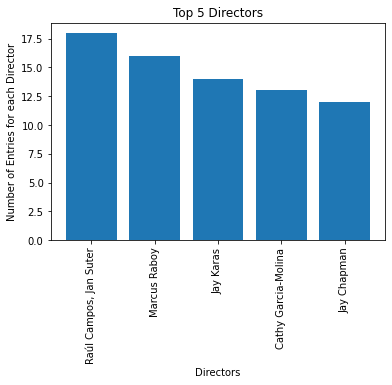

In [ ]:
directors = data["director"].value_counts().to_frame().reset_index(level = [0])
plt.bar(directors["index"][1:6], directors["director"][1:6])
plt.title("Top 5 Directors")
plt.xlabel("Directors")
plt.ylabel("Number of Entries for each Director")
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [ ]:
content_type = data["type"].value_counts()
content_type

Movie      5377
TV Show    2410
Name: type, dtype: int64

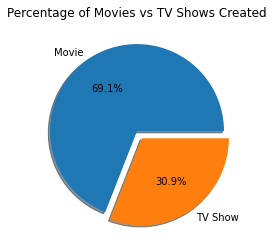

In [ ]:
explode = (0, 0.1)
plt.pie(content_type.values, explode = explode, labels = content_type.index, autopct='%1.1f%%', shadow = True)
plt.title("Percentage of Movies vs TV Shows Created")
plt.show()

In [ ]:
release_year = data["release_year"].value_counts()
release_year[:20]

2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
2011     166
2009     137
2008     125
2006      85
2007      85
2005      73
2004      59
2003      49
2002      45
2001      36
Name: release_year, dtype: int64

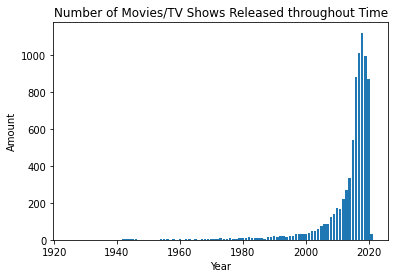

In [ ]:
plt.bar(release_year.index, release_year.values)
plt.title("Number of Movies/TV Shows Released throughout Time")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

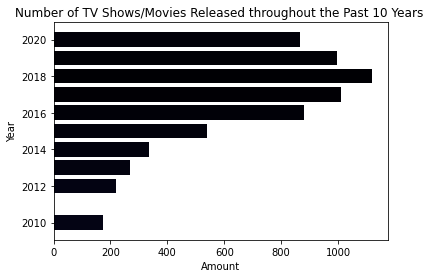

In [ ]:
my_cmap = plt.get_cmap("magma")
plt.barh(release_year.index[:10], release_year.values[:10], color = my_cmap.colors)
plt.title("Number of TV Shows/Movies Released throughout the Past 10 Years ")
plt.xlabel("Amount")
plt.ylabel("Year")
plt.show()

In [ ]:
country = data["country"].value_counts()
country.drop(labels="Unknown", inplace = True)
country

United States                                    2555
India                                             923
United Kingdom                                    397
Japan                                             226
South Korea                                       183
                                                 ... 
Japan, Canada, United States                        1
United Arab Emirates, Jordan, Lebanon               1
Philippines, Singapore                              1
Canada, Luxembourg                                  1
United States, Czech Republic, United Kingdom       1
Name: country, Length: 681, dtype: int64

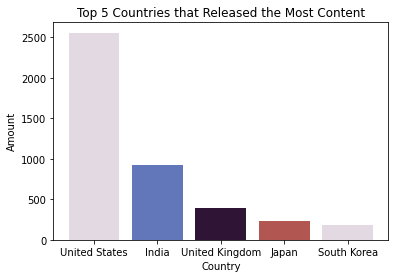

In [ ]:
my_cmap = plt.get_cmap("twilight", 5)
plt.bar(country.index[:5],country.values[:5], color = my_cmap.colors)
plt.title("Top 5 Countries that Released the Most Content")
plt.xlabel("Country")
plt.ylabel("Amount")
plt.show()

In [ ]:
rating = data["rating"].value_counts()
rating

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

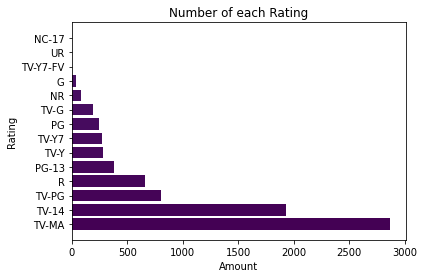

In [ ]:
my_cmap = plt.get_cmap("viridis")
plt.barh(rating.index, rating.values, color = my_cmap.colors)
plt.title("Number of each Rating")
plt.xlabel("Amount")
plt.ylabel("Rating")
plt.show()

In [ ]:
years = [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010]
data_after2010 = data[data["release_year"] >= 2010]

years = data_after2010.groupby(['release_year', "type"])['rating'].count()
years

release_year  type   
2010          Movie      136
              TV Show     37
2011          Movie      127
              TV Show     39
2012          Movie      158
              TV Show     61
2013          Movie      202
              TV Show     65
2014          Movie      244
              TV Show     90
2015          Movie      382
              TV Show    159
2016          Movie      642
              TV Show    240
2017          Movie      744
              TV Show    268
2018          Movie      734
              TV Show    387
2019          Movie      582
              TV Show    414
2020          Movie      411
              TV Show    457
2021          Movie       12
              TV Show     19
Name: rating, dtype: int64

In [ ]:
years = years.reset_index()
years[:10]

,release_year,type,rating
0,2010,Movie,136
1,2010,TV Show,37
2,2011,Movie,127
3,2011,TV Show,39
4,2012,Movie,158
5,2012,TV Show,61
6,2013,Movie,202
7,2013,TV Show,65
8,2014,Movie,244
9,2014,TV Show,90


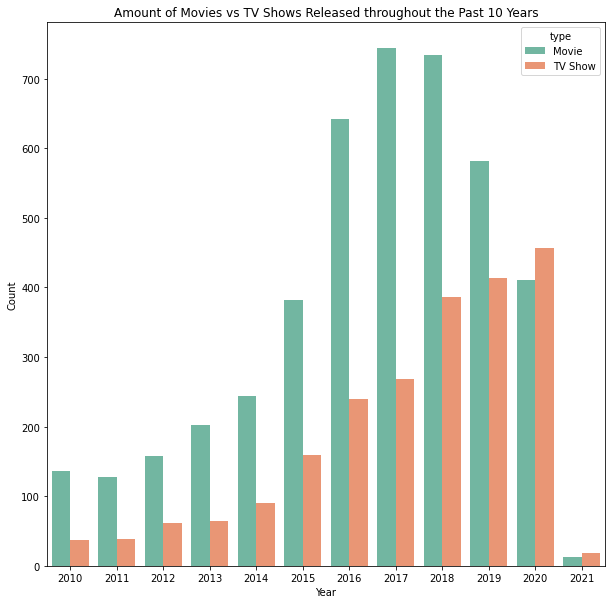

In [ ]:
bar, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = "release_year", y = "rating", hue = "type", data = years, palette =  sns.color_palette("Set2", 5))
plt.title("Amount of Movies vs TV Shows Released throughout the Past 10 Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()